<a href="https://colab.research.google.com/github/Arnava-03/sentiment_analysis_Amazon_review/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment analysis
Dataset - amazon_customer_reviews link:https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
*    Using NLTK module for sentiment analysis (VADER)
*    Hugging face transformer model for Text classification (RoBERTa)
*    Comparing performance through output scores
*    Review examples where model scores and customer ratings differ the most

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk


IMPORTING THE DATASET


In [ ]:
#import the dataset
df = pd.read_csv('/content/drive/MyDrive/amazon_review_dataset/Reviews.csv')

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [ ]:
df.shape

(568454, 10)

In [ ]:
#check missing values
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [ ]:
# since useful entries like SCORE and TEXT feedback have no missing values, we can go ahead with the dataset

In [ ]:
#using first 10000 entries for efficient testing and performance comparison
values = dict(df[:10000]['Score'].value_counts().sort_index())
print(values)

{1: 932, 2: 590, 3: 862, 4: 1433, 5: 6183}


Plots using matplotlib to get basic idea about distribution of customer rating

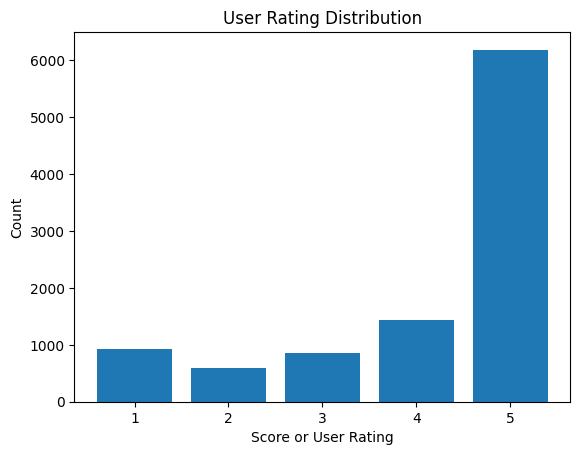

In [ ]:
plt.bar(values.keys(), values.values())
plt.xlabel('Score or User Rating')
plt.ylabel('Count')
plt.title('User Rating Distribution')
plt.show()

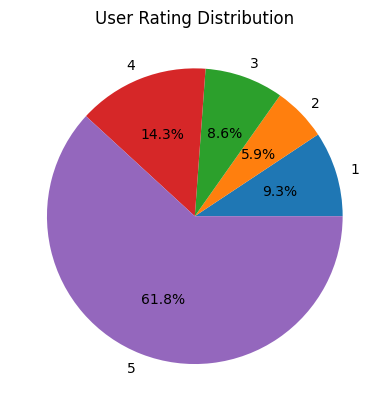

In [ ]:
plt.pie(values.values(), labels=values.keys(), autopct='%1.1f%%')
plt.title('User Rating Distribution')
plt.show()

## Standard VADER approach


Vader stands for Valence Aware Dictionary and Sentiment Reasoner <br>


*   It is an NLTK module for performing sentiment analysis
*   Uses the 'bag of words' approach to get negative/neutral/positive scores on the text provided

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
mod = SentimentIntensityAnalyzer()

In [ ]:
print((mod.polarity_scores('This is the worst movie')))
print((mod.polarity_scores('This is the best movie')))
# compound score is an aggregate of all the 3 scores ranging from -1 to 1.

{'neg': 0.506, 'neu': 0.494, 'pos': 0.0, 'compound': -0.6249}
{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}


In [ ]:
#taking an example text from the dataset
test_example = df['Text'][0]
print(test_example)
print(mod.polarity_scores(test_example))

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}


In [ ]:
batch_size = 10000
new_df = df[:batch_size]

for i in range(0,batch_size):
  sample = new_df['Text'][i]
  score = mod.polarity_scores(sample)
  new_df.loc[i,'compound'] = score['compound']
  new_df.loc[i,'neg'] = score['neg']
  new_df.loc[i,'neu'] = score['neu']
  new_df.loc[i,'pos'] = score['pos']

<ipython-input-16-3739c23734b4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[i,'compound'] = score['compound']
<ipython-input-16-3739c23734b4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[i,'neg'] = score['neg']
<ipython-input-16-3739c23734b4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [ ]:
new_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,compound,neg,neu,pos
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.9441,0.000,0.695,0.305
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.5664,0.138,0.862,0.000
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.8265,0.091,0.754,0.155
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0000,0.000,1.000,0.000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.9468,0.000,0.552,0.448


**Reviewing performance**
*    Through Classification accuracy using compound score
*    Plotting graphs for (Compound/positive/negative Score) vs Customer Rating

In [ ]:
# defining an accuracy measure for sentiment analysis using compound score

from sklearn.metrics import accuracy_score, confusion_matrix

threshold = 0.05

# Classify reviews
new_df['predicted_sentiment'] = new_df['compound'].apply(lambda x: 1 if x >= threshold else 0)

accuracy = accuracy_score(new_df['predicted_sentiment'], new_df['Score'] >= 3)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.86


<ipython-input-18-30226239c296>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['predicted_sentiment'] = new_df['compound'].apply(lambda x: 1 if x >= threshold else 0)


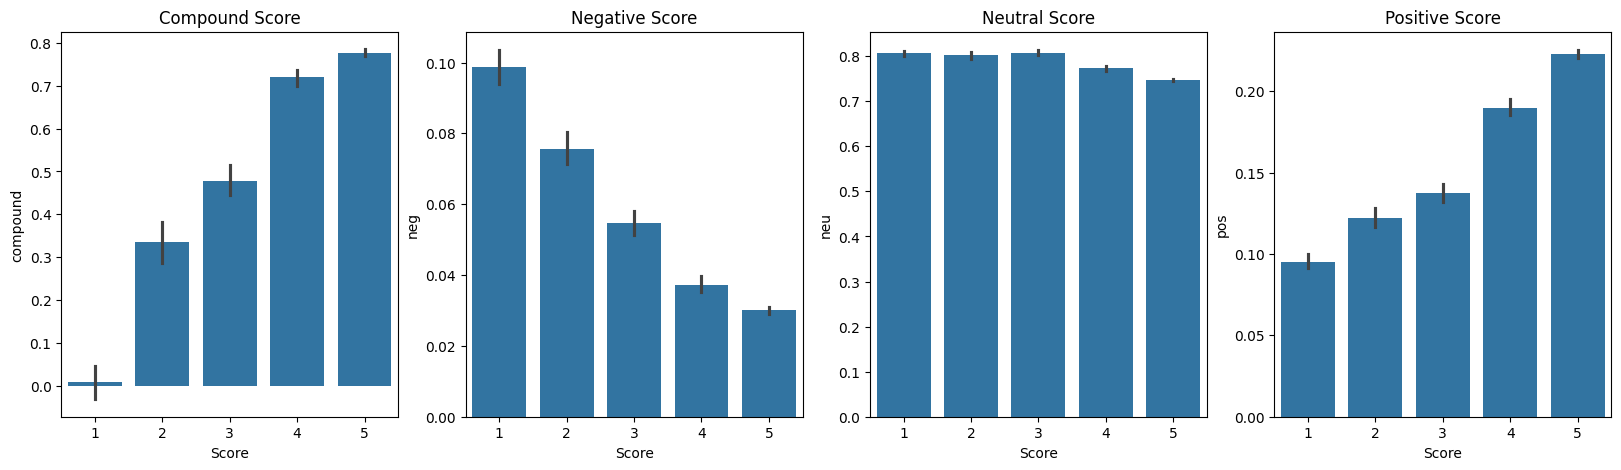

In [ ]:
fig, axs = plt.subplots(1,4, figsize=(20,5))
sns.barplot(y='compound', x='Score', data=new_df, ax=axs[0])
sns.barplot(y='neg', x='Score', data=new_df, ax=axs[1])
sns.barplot(y='neu', x='Score', data=new_df, ax=axs[2])
sns.barplot(y='pos', x='Score', data=new_df, ax=axs[3])
axs[0].set_title('Compound Score')
axs[1].set_title('Negative Score')
axs[2].set_title('Neutral Score')
axs[3].set_title('Positive Score')
plt.show()

## Hugging Face Transformers
- RoBERTa model : pretrained model which accounts for context of words in a text.

In [ ]:
# !pip install transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import torch.nn.functional as F

In [ ]:
checkpoint = 'cardiffnlp/twitter-roberta-base-sentiment-latest'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# using on a test example
test_example = df['Text'][0]
print(test_example)
input_tokens = tokenizer(test_example, padding=True, return_tensors='pt')
print(f'\nInput Ids: {input_tokens}')
outputs = model(**input_tokens)
# print(outputs)
scores = F.softmax(outputs.logits, dim=-1).detach().numpy()
res = {
    'neg': scores[0][0],
    'neu': scores[0][1],
    'pos': scores[0][2]
}
print(f'\nModel output scores: {res}')


I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.

Input Ids: {'input_ids': tensor([[    0,   100,    33,  2162,   484,     9,     5, 23911,  1571, 24623,
          2335,   689,   785,     8,    33,   303,   106,    70,     7,    28,
             9,   205,  1318,     4,    20,  1152,  1326,    55,   101,    10,
         24571,    87,    10, 12069,  4884,     8,    24, 28078,   357,     4,
          1308, 26882,    16,  8746, 14963,     8,    79, 14137,  1626,    42,
          1152,   357,    87,  1437,   144,     4,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1]])}

Model output scores: {'neg': 0.010

In [25]:
# making predictions on our dataset
for i, sample in tqdm(enumerate(new_df['Text'])):
  input_tokens = tokenizer(sample, padding=True, truncation=True, max_length=512, return_tensors='pt')
  outputs = model(**input_tokens)
  scores = F.softmax(outputs.logits, dim=-1).detach().numpy()
  new_df.loc[i,'roberta_neg'] = scores[0][0]
  new_df.loc[i,'roberta_neu'] = scores[0][1]
  new_df.loc[i,'roberta_pos'] = scores[0][2]


0it [00:00, ?it/s]

In [30]:
#finding predicted sentiment for robert model using pos neg and neu scores

def predict_sentiment_roberta(row):
  if row['roberta_pos'] > row['roberta_neg']:
    return 1
  else:
    return 0

new_df['predicted_sentiment_roberta'] = new_df.apply(predict_sentiment_roberta, axis=1)


<ipython-input-30-e723808c2023>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['predicted_sentiment_roberta'] = new_df.apply(predict_sentiment_roberta, axis=1)


In [31]:
new_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,compound,neg,neu,pos,predicted_sentiment,roberta_neg,roberta_neu,roberta_pos,predicted_sentiment_roberta
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.9441,0.000,0.695,0.305,1,0.010578,0.038816,0.950607,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.5664,0.138,0.862,0.000,0,0.716768,0.271225,0.012007,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.8265,0.091,0.754,0.155,1,0.005176,0.077858,0.916966,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0000,0.000,1.000,0.000,0,0.002919,0.047125,0.949957,1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.9468,0.000,0.552,0.448,1,0.004527,0.009283,0.986190,1


In [32]:
#compute accuracy using the same measure
acc = accuracy_score(new_df['predicted_sentiment_roberta'], new_df['Score'] >= 3)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.88


COMPARE SCORES

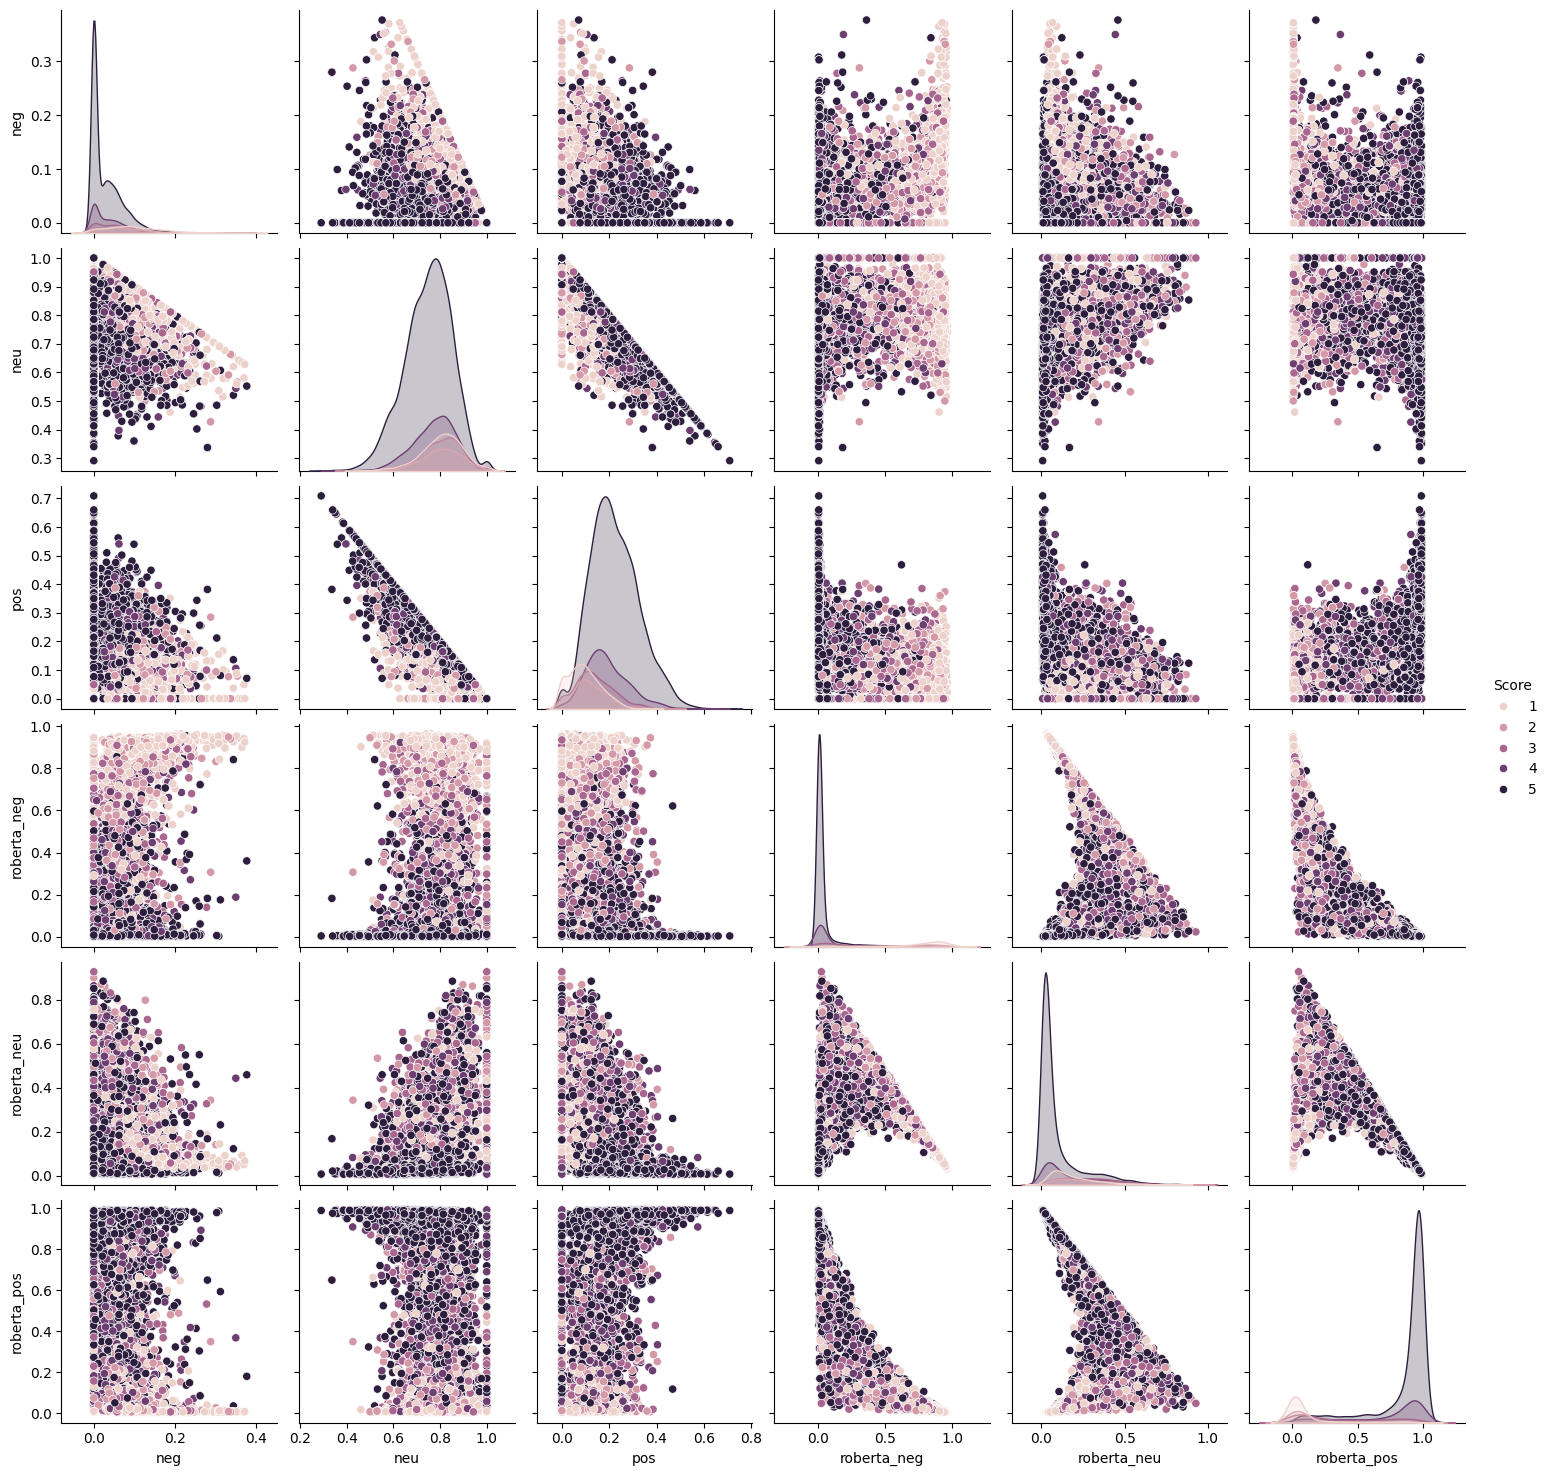

In [33]:
sns.pairplot(data = new_df, vars = ['neg', 'neu', 'pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'],hue='Score')
plt.show()

## Diving into ***misclassifications***

Let's take a look at examples where the models predicted score and customer rating do not match.
*    More specifically we'll look at positive labelled  1 star ratings and negative labelled 5 star ratings

In [38]:
# Given below are reviews rated 1 star by customer and text predicted positive by the RoBERTa model
new_df.query('Score == 1').sort_values('roberta_pos', ascending = False)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,compound,neg,neu,pos,predicted_sentiment,roberta_neg,roberta_neu,roberta_pos,predicted_sentiment_roberta
4380,4381,B004391DK0,AOYBPBZLGSDOK,gram,0,0,1,1350604800,gram,Bisquick GF is easy to use. Pancakes and muffi...,0.7003,0.000,0.799,0.201,1,0.004090,0.014011,0.981899,1
4278,4279,B004391DK0,AA5HS6LQ8XC6G,"Fantasticalice Alice ""Phat G-ma""",25,39,1,1287360000,"Sugar,sugar,sugar",Second ingredient is SUGAR! Need I say more? M...,0.8118,0.000,0.638,0.362,1,0.002576,0.034383,0.963042,1
4872,4873,B001TY6T6K,A3UPXR0I04EO4W,LuvLeaf,4,5,1,1272067200,The other reviewer is totally right!!!,You can get these SOOOOOOOOOOOOO much cheaper ...,0.0000,0.000,1.000,0.000,0,0.003880,0.035863,0.960257,1
5068,5069,B001872UAW,A36EA5Y29VIHEZ,Smith,0,1,1,1318204800,"Thick, sweet, heavy tomato base, not Mexican s...","Tortilla soup is one of my favorite soups, and...",0.9647,0.000,0.860,0.140,1,0.008681,0.066002,0.925318,1
6191,6192,B000UOFW9K,A1A37GPJDM9IAG,linda l. lawrence,0,0,1,1280707200,Check for accurate weight in the bag.,I am constantly looking for gluten free foods ...,0.8224,0.053,0.831,0.115,1,0.007880,0.072309,0.919811,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4459,4460,B002YZESWU,AZOIFQLUQXJHH,Rob Kaufman,1,3,1,1326240000,"High Risk, don't buy!",One of the vials was broken when we received t...,-0.2617,0.085,0.915,0.000,0,0.935784,0.059050,0.005166,0
1161,1162,B003JNWQPC,A37WXUMQ6CZ1GM,Wileybowmaker,4,7,1,1285891200,Vendor ripped off all of their cultures from o...,This vendor is unscrupulous. She ripped off he...,-0.2040,0.123,0.802,0.075,0,0.935165,0.059704,0.005131,0
7637,7638,B000TRFGGM,A37ROD5530GXW7,Disappointed by Venus,0,0,1,1349308800,The worst purchase I ever made from Amazon,"I received an undersized, sickly plant that co...",-0.4015,0.109,0.891,0.000,0,0.935503,0.059423,0.005074,0
7621,7622,B000TRFGGM,A2HAL4K7TQWTLC,scoot,3,3,1,1338768000,venus flytrap,this plant appears to be dead on arrival.... i...,-0.9261,0.203,0.731,0.066,0,0.939871,0.055163,0.004966,0


In [45]:
new_df.query('Score == 1').sort_values('pos', ascending = False)['Text'].values[0]
#As you can observe the model confuses this bad review of the product due to words like 'GREAT' and 'AWESOME'

'This flavor is horrible.  There are many other flavors much better.  Hawaiian Hazelnut is great!  Breakfast in Bed is AWesome!'

**Negative Sentiment and 5 star review**

In [49]:
#negative sentiment and 5-star review
new_df.query('Score == 5').sort_values('roberta_neg', ascending=False)['Text'].values[0]

'They have a bad taste,i finish giving them away because my son started to cry everytime i tried to give these.I prefer Beech nut or Gerber.Yuck!'

In [50]:
new_df.query('Score == 5').sort_values('neg', ascending=False)['Text'].values[0]

'My two cats must not be interested in grass, because it grew but they ignored it. Had no problems growing it.'

# using transformer pipeline

In [51]:
from transformers import pipeline
classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [54]:
# performing sentiment analysis using pipeline
example = new_df['Text'][50]
print(example)
print(classifier(example))

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.
[{'label': 'NEGATIVE', 'score': 0.9994776844978333}]
